In [1]:
%matplotlib inline
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from matplotlib import cm
from python_speech_features import mfcc
from itertools import cycle

In [2]:
data_dir = '/home/aparnami/Research/KeywordSpotting/Few-Shot KWS/data/speech_commands/core'
keywords = list(filter(lambda x : os.path.isdir(os.path.join(data_dir,x)),os.listdir(data_dir)))

In [3]:
N=3
K=3

In [4]:
indices = np.random.permutation(len(keywords))[:N]

In [5]:
np.array(keywords)[indices]

array(['marvin', 'left', 'two'], dtype='<U6')

In [6]:
classes = np.array(keywords)[indices]

In [7]:
def get_random_wavs(keyword, K=1):
     wavs = os.listdir(os.path.join(data_dir, keyword))
     random_wavs = np.random.permutation(wavs)[:K]
     return [wav.read(os.path.join(data_dir, keyword, wav_file))[1] for wav_file in random_wavs]

In [8]:
samples = [get_random_wavs(keyword, K) for keyword in classes]

In [9]:
cycol = cycle('bgrcm')

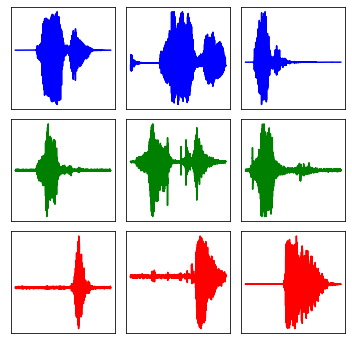

In [10]:
figure1 = plt.figure(figsize=(6,6))
for i in range(N):
    c = next(cycol)
    for j in range(K):
        ax = plt.subplot(N, K, i*N + j+1)
        ax.plot(samples[i][j], color=c)
        ax.set_xticks([])
        ax.set_yticks([])
plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [11]:
print(classes)
figure1.savefig('support-' + '-'.join(classes) + '.png', bbox_inches = "tight")

['marvin' 'left' 'two']


In [12]:
query_class = random.choice(classes)

In [13]:
query_sample = get_random_wavs(query_class)[0]

[]

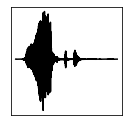

In [14]:
figure2 = plt.figure(figsize=(2,2))
ax = plt.subplot(111)
ax.plot(query_sample, color='k')
ax.set_xticks([])
ax.set_yticks([])

In [15]:
print(query_class)
figure2.savefig('query-' + query_class + '.png', bbox_inches = "tight")

left


In [ ]:
mfcc_feat = mfcc(sig, rate)
mfcc_data = np.swapaxes(mfcc_feat, 0 ,1)